##Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Importing the Dataset

In [ ]:
df = pd.read_csv("wdbc.data", header = None)
df.columns = [
    'ID', 'Diagnosis',
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
    'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
    'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]
df.drop('ID', axis = 1, inplace = True)
df.head()

,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


##Encoding the Dataset

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Diagnosis"] = le.fit_transform(df["Diagnosis"])

##Split features and target

In [ ]:
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

##Splitting the Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

##Training the Naive Bayes model on the Training set

###GaussianNB with Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
scaler = StandardScaler()
X_train_g = scaler.fit_transform(X_train)
X_test_g = scaler.transform(X_test)
gnb = GaussianNB()
gnb.fit(X_train_g, y_train)

GaussianNB()

###MultinomialNB

In [ ]:
# mnb = MultinomialNB(alpha = 0.4, force_alpha=True, fit_prior=True, class_prior=None)
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

###BernoulliNB

In [ ]:
# bnb = BernoulliNB(alpha = 0.4, force_alpha=True, fit_prior=False, class_prior=None)
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

BernoulliNB()

##GaussianNB- Accuracy, Precision, Recall, F-score, confusion matrix

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

y_pred_g = gnb.predict(X_test_g)

acc = accuracy_score(y_test, y_pred_g)

prec = precision_score(y_test, y_pred_g, average='macro')

rec = recall_score(y_test, y_pred_g, average='macro')

f1 = f1_score(y_test, y_pred_g, average='macro')

cm = confusion_matrix(y_test, y_pred_g)

print(f"Accuracy      : {acc:.2f}")
print(f"Precision     : {prec:.2f}")
print(f"Recall        : {rec:.2f}")
print(f"F1 Score      : {f1:.2f}")
print("Confusion Matrix:\n", cm)

Accuracy      : 0.95
Precision     : 0.95
Recall        : 0.95
F1 Score      : 0.95
Confusion Matrix:
 [[85  4]
 [ 3 51]]


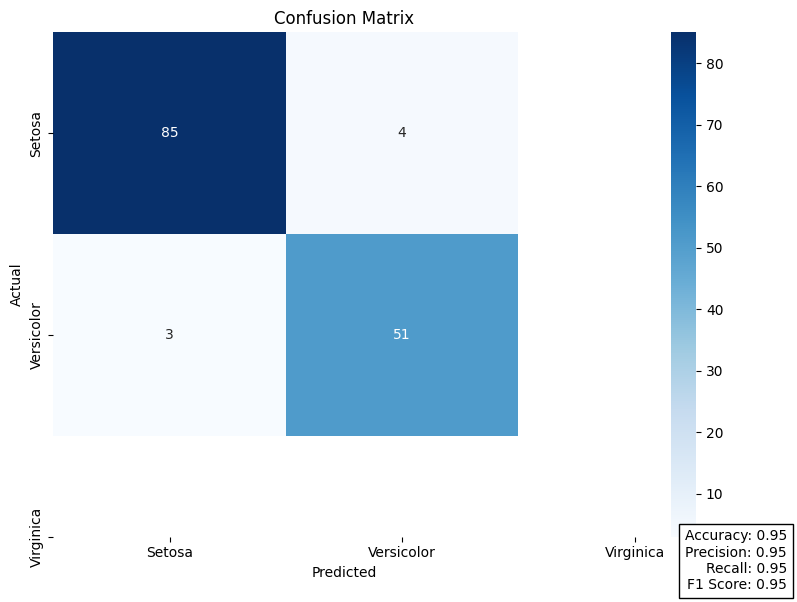

In [ ]:
# Plot with seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Setosa', 'Versicolor', 'Virginica'],
            yticklabels=['Setosa', 'Versicolor', 'Virginica'])

# Labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Add metrics text below the plot
plt.figtext(0.99, 0.01, f'Accuracy: {acc:.2f}\nPrecision: {prec:.2f}\nRecall: {rec:.2f}\nF1 Score: {f1:.2f}',
            horizontalalignment='right', fontsize=10, bbox=dict(facecolor='white', edgecolor='black'))

plt.tight_layout()
plt.show()

##MultinomialNB- Accuracy, Precision, Recall, F-score, confusion matrix

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_pred_m = mnb.predict(X_test)

acc = accuracy_score(y_test, y_pred_m)

prec = precision_score(y_test, y_pred_m, average='macro')

rec = recall_score(y_test, y_pred_m, average='macro')

f1 = f1_score(y_test, y_pred_m, average='macro')

cm = confusion_matrix(y_test, y_pred_m)

print(f"Accuracy      : {acc:.2f}")
print(f"Precision     : {prec:.2f}")
print(f"Recall        : {rec:.2f}")
print(f"F1 Score      : {f1:.2f}")
print("Confusion Matrix:\n", cm)

Accuracy      : 0.92
Precision     : 0.93
Recall        : 0.91
F1 Score      : 0.92
Confusion Matrix:
 [[87  2]
 [ 9 45]]


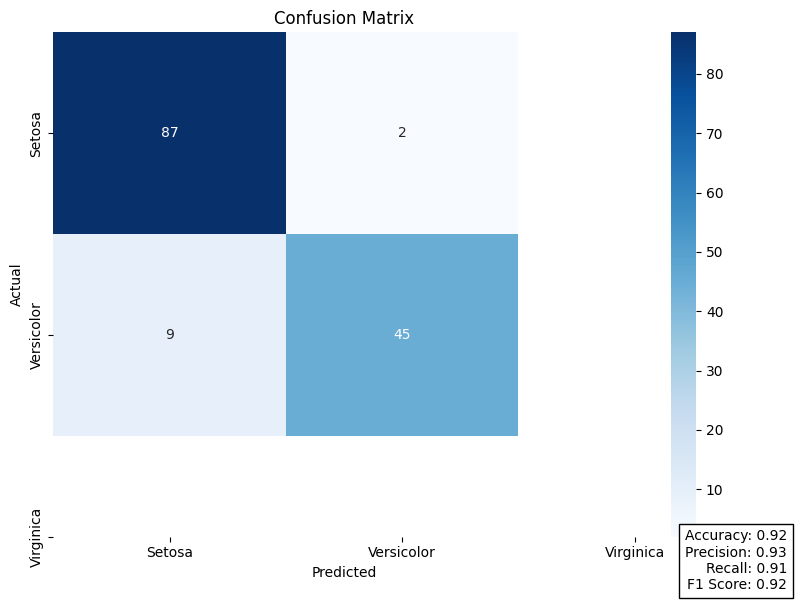

In [ ]:
# Plot with seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Setosa', 'Versicolor', 'Virginica'],
            yticklabels=['Setosa', 'Versicolor', 'Virginica'])

# Labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Add metrics text below the plot
plt.figtext(0.99, 0.01, f'Accuracy: {acc:.2f}\nPrecision: {prec:.2f}\nRecall: {rec:.2f}\nF1 Score: {f1:.2f}',
            horizontalalignment='right', fontsize=10, bbox=dict(facecolor='white', edgecolor='black'))

plt.tight_layout()
plt.show()

##BernoulliNB- Accuracy, Precision, Recall, F-score, confusion matrix

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

y_pred_b = bnb.predict(X_test)

acc = accuracy_score(y_test, y_pred_b)

prec = precision_score(y_test, y_pred_b, average='macro')

rec = recall_score(y_test, y_pred_b, average='macro')

f1 = f1_score(y_test, y_pred_b, average='macro')

cm = confusion_matrix(y_test, y_pred_b)

print(f"Accuracy      : {acc:.2f}")
print(f"Precision     : {prec:.2f}")
print(f"Recall        : {rec:.2f}")
print(f"F1 Score      : {f1:.2f}")
print("Confusion Matrix:\n", cm)

Accuracy      : 0.62
Precision     : 0.31
Recall        : 0.50
F1 Score      : 0.38
Confusion Matrix:
 [[89  0]
 [54  0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


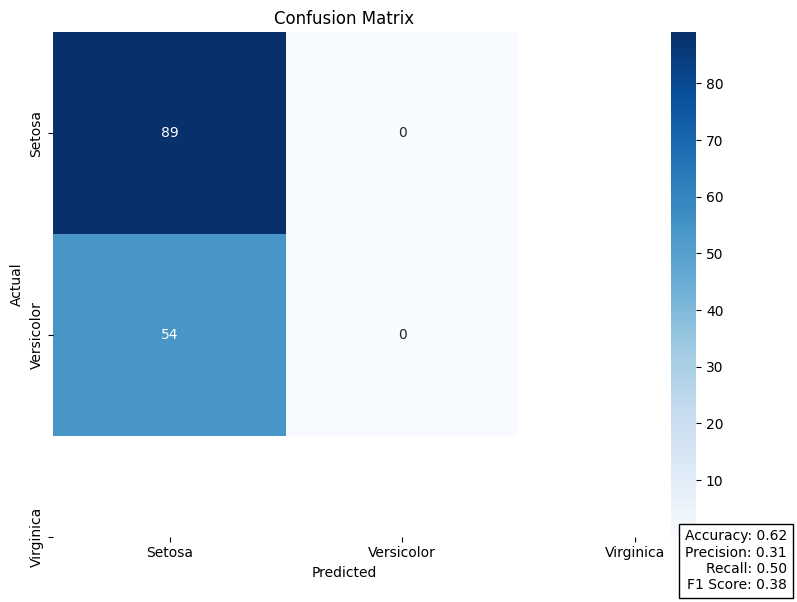

In [ ]:
# Plot with seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Setosa', 'Versicolor', 'Virginica'],
            yticklabels=['Setosa', 'Versicolor', 'Virginica'])

# Labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Add metrics text below the plot
plt.figtext(0.99, 0.01, f'Accuracy: {acc:.2f}\nPrecision: {prec:.2f}\nRecall: {rec:.2f}\nF1 Score: {f1:.2f}',
            horizontalalignment='right', fontsize=10, bbox=dict(facecolor='white', edgecolor='black'))

plt.tight_layout()
plt.show()